In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('uac_limpio.csv')

# Mostrar las primeras filas del dataset para ver la estructura
print("Dataset antes de limpiar:")
print(df.head())

# Eliminar la columna 'ESCUELA' ya que consideramos que no es una característica relevante
df = df.drop(columns=['ESCUELA'])
# df = df.drop(columns=['EXCELENCIA'])
# df = df.drop(columns=['PPAnterior'])
# Manejar valores faltantes (si los hay)
# Para este ejemplo, vamos a rellenar valores faltantes con la mediana para variables numéricas
# y con el valor más frecuente para las categóricas.
for column in df.columns:
    if df[column].dtype == 'object':
        # Si la columna es categórica, rellenar con el valor más frecuente
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Si la columna es numérica, rellenar con la mediana
        df[column].fillna(df[column].median(), inplace=True)

# Asegurarnos de que los tipos de datos sean correctos
# Convertir variables categóricas que ya están en formato numérico, pero con valores significativos, a 'int'
categorical_columns = ['SEXO', 'EST_CIVIL', 'HIJOS', 'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON']
for column in categorical_columns:
    df[column] = df[column].astype(int)

# Mostrar el dataset después de la limpieza
print("\nDataset después de limpiar:")
print(df.head())

# Guardar el dataset limpio en un nuevo archivo CSV (opcional)
df.to_csv('uac_limpio_clean.csv', index=False)


Dataset antes de limpiar:
          ESCUELA  EDAD  SEXO  EST_CIVIL  HIJOS  TRABAJA_ESTUDIA  VIVE_SOLO  \
0  ADMINISTRACIÓN    20     1          0      0                0          0   
1  ADMINISTRACIÓN    27     0          0      0                1          0   
2  ADMINISTRACIÓN    22     0          0      0                1          1   
3  ADMINISTRACIÓN    27     1          2      1                1          1   
4  ADMINISTRACIÓN    31     0          0      0                1          1   

   NIVEL_SOCIO_ECON  SEMESTRE  PPACumulado  PPAnterior  
0                 2         4       14.128      14.389  
1                 2         5       12.796      12.632  
2                 1        10       14.906      15.381  
3                 2         7       15.309      15.762  
4                 2        10       14.581      13.000  

Dataset después de limpiar:
   EDAD  SEXO  EST_CIVIL  HIJOS  TRABAJA_ESTUDIA  VIVE_SOLO  NIVEL_SOCIO_ECON  \
0    20     1          0      0                

<ipython-input-1-04fc3793a786>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


Error Cuadrático Medio (MSE): 2.57
Raíz del Error Cuadrático Medio (RMSE): 1.60
Coeficiente de Determinación (R² Score): 0.34


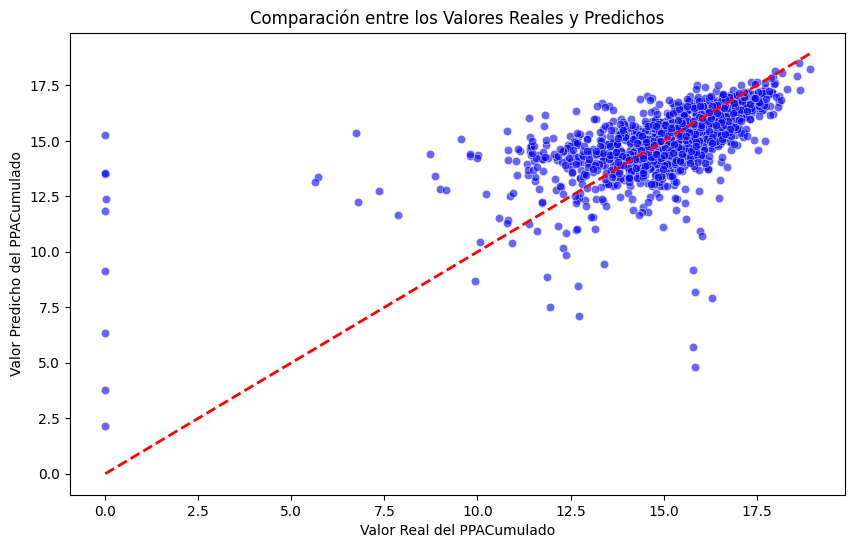

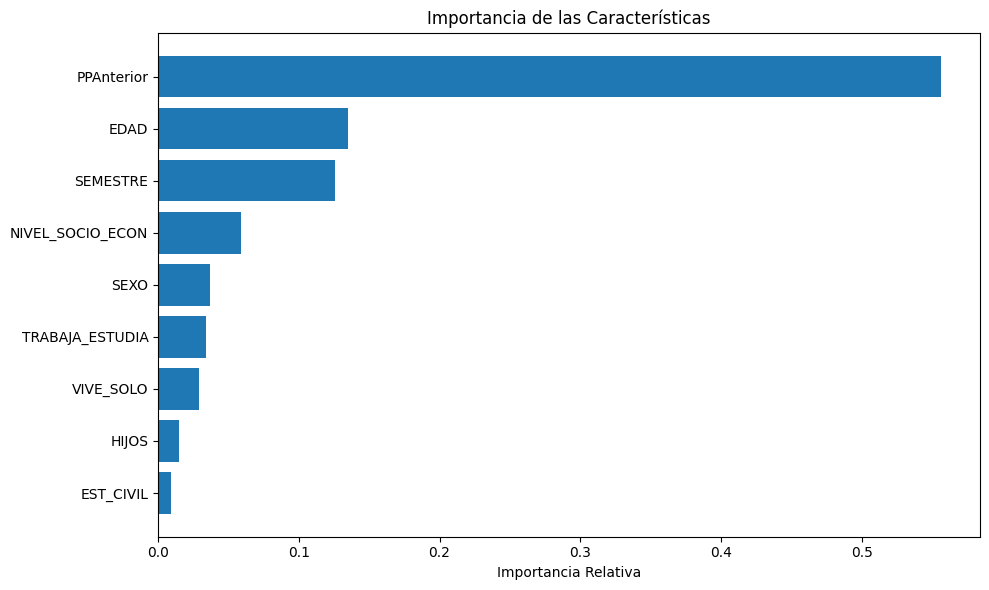

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv('uac_limpio_clean.csv')

# Definir características y variable objetivo
X = df.drop(columns=['PPACumulado'])  # Características
y = df['PPACumulado']  # Variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 1. Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

# 2. Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

# 3. Error Absoluto Medio (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Error Absoluto Medio (MAE): {mae:.2f}")

# 4. Coeficiente de Determinación (R² Score)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R² Score): {r2:.2f}")

# Visualización de los resultados: Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real del PPACumulado')
plt.ylabel('Valor Predicho del PPACumulado')
plt.title('Comparación entre los Valores Reales y Predichos')
plt.show()

# Importancia de las características
feature_importance = rf_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.tight_layout()
plt.show()


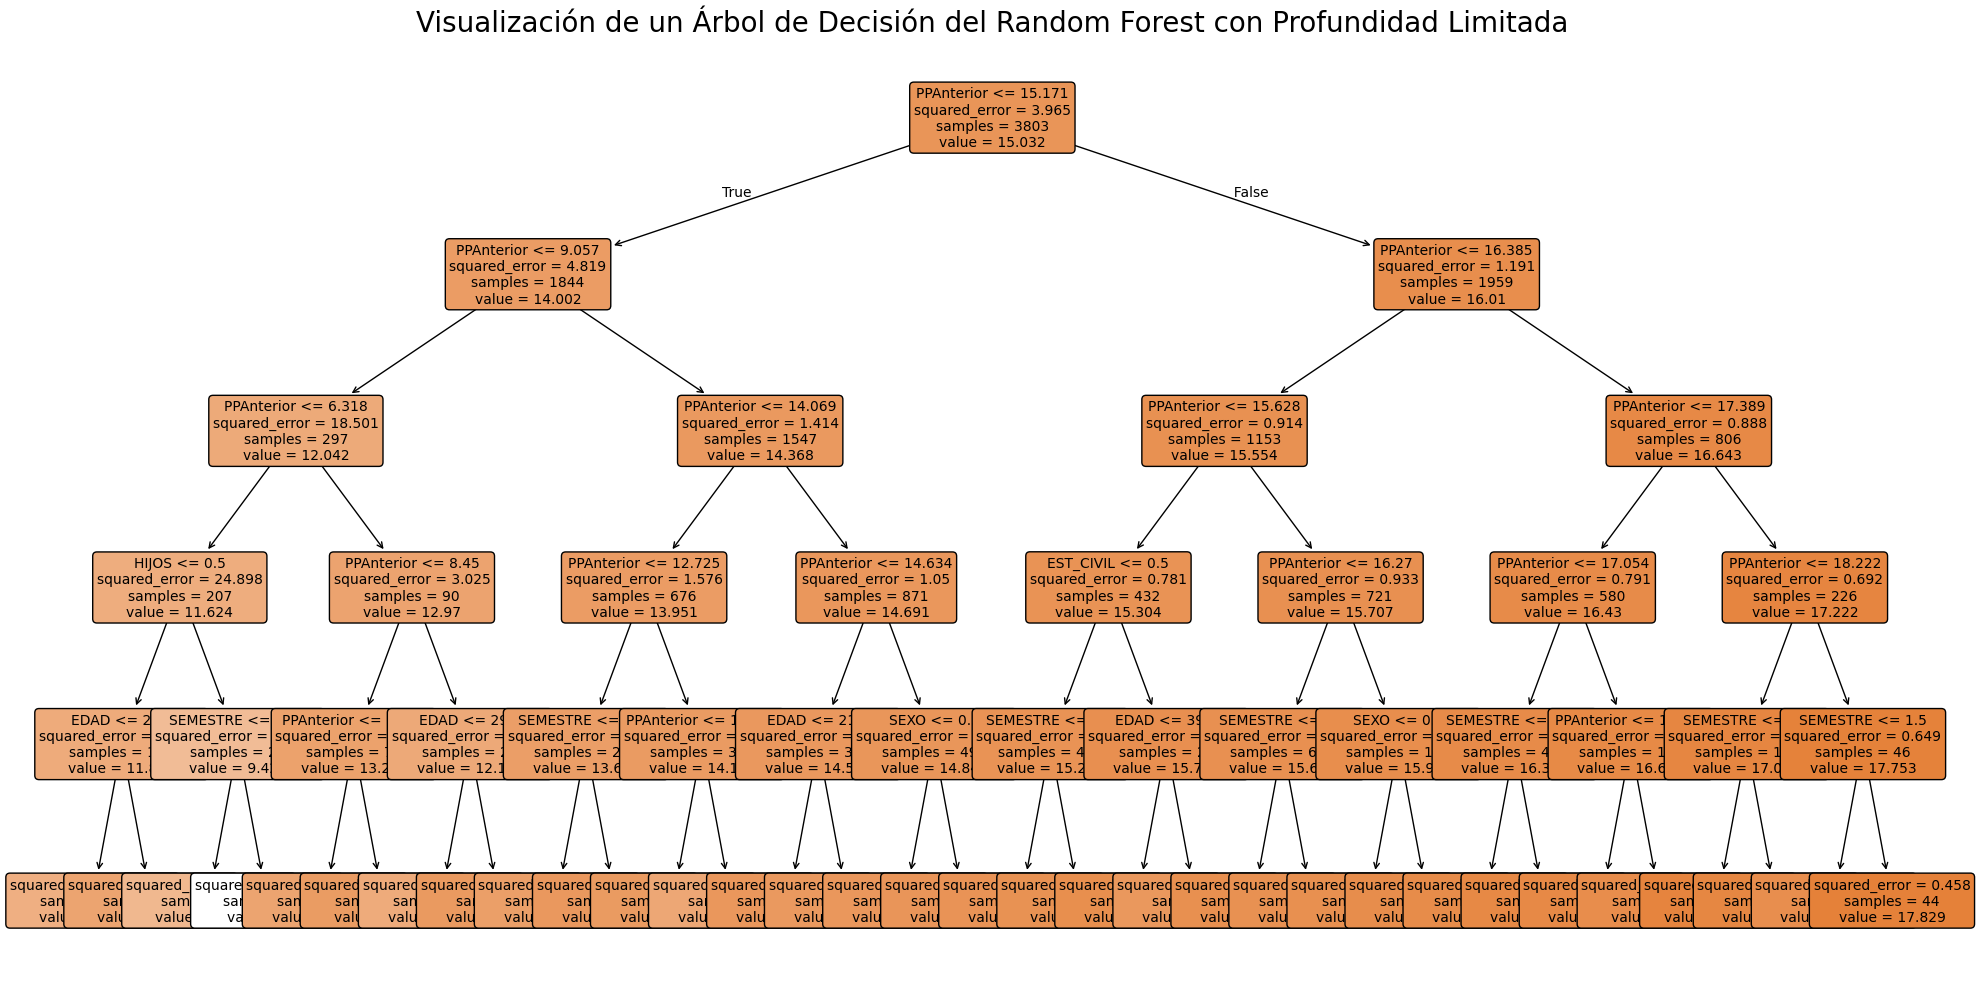

Profundidad del árbol: 5
Número de nodos: 63


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo Random Forest con una profundidad máxima de 5
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Luego, puedes usar el mismo código que tenías para visualizar el árbol con la nueva restricción de profundidad
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleccionar un árbol para visualizar (por ejemplo, el primer árbol del Random Forest)
tree_to_visualize = rf_model.estimators_[0]

# Crear la figura y ajustar el tamaño
plt.figure(figsize=(20, 10))

# Visualizar el árbol
plot_tree(tree_to_visualize,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Visualización de un Árbol de Decisión del Random Forest con Profundidad Limitada", fontsize=20)
plt.tight_layout()
plt.show()

# Imprimir información adicional sobre el árbol
print(f"Profundidad del árbol: {tree_to_visualize.tree_.max_depth}")
print(f"Número de nodos: {tree_to_visualize.tree_.node_count}")


In [ ]:
import pandas as pd

# Crear un DataFrame con los datos del nuevo estudiante
# Ajusta los valores de acuerdo con las características de tu dataset
new_student = pd.DataFrame({
    'EDAD': [20],                # Edad del estudiante
    'SEXO': [0],                 # 0 para masculino, 1 para femenino
    'EST_CIVIL': [0],            # Estado civil: 0 = Soltero, 1 = Casado, 2 = Conviviente
    'HIJOS': [0],                # 0 si no tiene hijos, 1 si tiene
    'TRABAJA_ESTUDIA': [0],      # 0 si no trabaja, 1 si trabaja y estudia
    'VIVE_SOLO': [0],            # 0 si no vive solo, 1 si vive solo
    'NIVEL_SOCIO_ECON': [2],     # Nivel socioeconómico: 0 = C, 1 = B, 2 = A
    'SEMESTRE': [10],             # Semestre en el que se encuentra
    'PPAnterior': [18.687]         # Promedio ponderado anterior
})

# Realizar la predicción usando el modelo entrenado
predicted_ppacumulado = rf_model.predict(new_student)

# Mostrar el resultado
print(f"\nPredicción para el nuevo estudiante: El PPACumulado estimado es {predicted_ppacumulado[0]:.2f}")



Predicción para el nuevo estudiante: El PPACumulado estimado es 18.06


**EXPORTAR MODELO EN ARCHIVO .pkl**

In [ ]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(rf_model, 'modelo_random_forest.pkl')

# Ahora, este archivo .pkl estará en tu entorno de Colab

['modelo_random_forest.pkl']